<a href="https://colab.research.google.com/github/fedhere/MLPNS2021/blob/main/NNDL/yolodemo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os

In [2]:
!git clone https://github.com/pjreddie/darknet.git



Cloning into 'darknet'...
remote: Enumerating objects: 5934, done.
remote: Total 5934 (delta 0), reused 0 (delta 0), pack-reused 5934
Receiving objects: 100% (5934/5934), 6.35 MiB | 22.03 MiB/s, done.
Resolving deltas: 100% (3926/3926), done.


In [3]:
cd darknet

/content/darknet


In [4]:
ls

cfg/       include/      LICENSE.gen   LICENSE.mit  python/    src/
data/      LICENSE       LICENSE.gpl   LICENSE.v1   README.md
examples/  LICENSE.fuck  LICENSE.meta  Makefile     scripts/


In [5]:
!sed -i 's/GPU=0/GPU=1/g' Makefile
!sed -i 's/compute_30/compute_50/g' Makefile
!sed -i 's/sm_30/sm_50/g' Makefile
!make

mkdir -p obj
mkdir -p backup
mkdir -p results
gcc -Iinclude/ -Isrc/ -DGPU -I/usr/local/cuda/include/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -DGPU -c ./src/gemm.c -o obj/gemm.o
./src/gemm.c: In function ‘time_gpu’:
./src/gemm.c:232:9: warning: ‘cudaThreadSynchronize’ is deprecated [-Wdeprecated-declarations]
         cudaThreadSynchronize();
         ^~~~~~~~~~~~~~~~~~~~~
In file included from /usr/local/cuda/include/cuda_runtime.h:96:0,
                 from include/darknet.h:11,
                 from ./src/utils.h:5,
                 from ./src/gemm.c:2:
/usr/local/cuda/include/cuda_runtime_api.h:967:57: note: declared here
 extern __CUDA_DEPRECATED __host__ cudaError_t CUDARTAPI cudaThreadSynchronize(void);
                                                         ^~~~~~~~~~~~~~~~~~~~~
gcc -Iinclude/ -Isrc/ -DGPU -I/usr/local/cuda/include/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -DGPU -c ./src/utils.c -o obj/utils.o


In [6]:
!wget http://pjreddie.com/media/files/yolov1/yolov1.weights

--2021-05-06 00:44:43--  http://pjreddie.com/media/files/yolov1/yolov1.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://pjreddie.com/media/files/yolov1/yolov1.weights [following]
--2021-05-06 00:44:43--  https://pjreddie.com/media/files/yolov1/yolov1.weights
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 789312988 (753M) [application/octet-stream]
Saving to: ‘yolov1.weights’

yolov1.weights      100%[===================>] 752.75M  87.8MB/s    in 9.0s    

2021-05-06 00:44:52 (83.3 MB/s) - ‘yolov1.weights’ saved [789312988/789312988]



In [7]:
ls data

9k.labels   coco.names   goal.txt                  inet9k.map        person.jpg
9k.names    dog.jpg      horses.jpg                kite.jpg          scream.jpg
9k.tree     eagle.jpg    imagenet.labels.list      labels/           voc.names
coco9k.map  giraffe.jpg  imagenet.shortnames.list  openimages.names


In [8]:
from PIL import Image
imme = Image.open("data/dog.jpg")

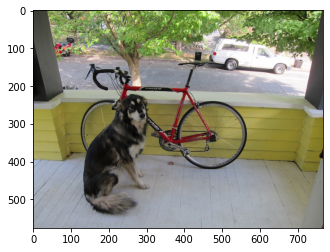

In [9]:
import pylab as pl
import numpy as np
pl.imshow(np.array(imme))

In [10]:
!wget http://pjreddie.com/media/files/yolov1/yolov1.weights

URL transformed to HTTPS due to an HSTS policy
--2021-05-06 00:44:53--  https://pjreddie.com/media/files/yolov1/yolov1.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 789312988 (753M) [application/octet-stream]
Saving to: ‘yolov1.weights.1’

yolov1.weights.1    100%[===================>] 752.75M  89.7MB/s    in 8.8s    

2021-05-06 00:45:01 (85.9 MB/s) - ‘yolov1.weights.1’ saved [789312988/789312988]



In [11]:
!ls -ltr

total 1547136
-rw-r--r-- 1 root root 789312988 Mar 25  2018 yolov1.weights.1
-rw-r--r-- 1 root root 789312988 Mar 25  2018 yolov1.weights
-rw-r--r-- 1 root root       474 May  6 00:44 LICENSE.fuck
-rw-r--r-- 1 root root       515 May  6 00:44 LICENSE
-rw-r--r-- 1 root root      1846 May  6 00:44 README.md
-rw-r--r-- 1 root root       461 May  6 00:44 LICENSE.v1
-rw-r--r-- 1 root root      1071 May  6 00:44 LICENSE.mit
-rw-r--r-- 1 root root       360 May  6 00:44 LICENSE.meta
-rw-r--r-- 1 root root     35141 May  6 00:44 LICENSE.gpl
-rw-r--r-- 1 root root      6652 May  6 00:44 LICENSE.gen
drwxr-xr-x 2 root root      4096 May  6 00:44 cfg
drwxr-xr-x 3 root root      4096 May  6 00:44 data
drwxr-xr-x 2 root root      4096 May  6 00:44 scripts
drwxr-xr-x 2 root root      4096 May  6 00:44 python
drwxr-xr-x 2 root root      4096 May  6 00:44 include
drwxr-xr-x 2 root root      4096 May  6 00:44 examples
drwxr-xr-x 2 root root      4096 May  6 00:44 src
-rw-r--r-- 1 root root      3040 May

In [12]:
!./darknet yolo test /content/darknet/cfg/yolov1.cfg /content/darknet/yolov1.weights /content/darknet/data/dog.jpg

layer     filters    size              input                output
    0 conv     64  7 x 7 / 2   448 x 448 x   3   ->   224 x 224 x  64  0.944 BFLOPs
    1 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    2 conv    192  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 192  2.775 BFLOPs
    3 max          2 x 2 / 2   112 x 112 x 192   ->    56 x  56 x 192
    4 conv    128  1 x 1 / 1    56 x  56 x 192   ->    56 x  56 x 128  0.154 BFLOPs
    5 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    6 conv    256  1 x 1 / 1    56 x  56 x 256   ->    56 x  56 x 256  0.411 BFLOPs
    7 conv    512  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 512  7.399 BFLOPs
    8 max          2 x 2 / 2    56 x  56 x 512   ->    28 x  28 x 512
    9 conv    256  1 x 1 / 1    28 x  28 x 512   ->    28 x  28 x 256  0.206 BFLOPs
   10 conv    512  3 x 3 / 1    28 x  28 x 256   ->    28 x  28 x 512  1.850 BFLOPs
   11 conv    256  1 x 1 / 1    28 x  28 x 512   ->

In [13]:
!ls -ltr

total 1547256
-rw-r--r-- 1 root root 789312988 Mar 25  2018 yolov1.weights.1
-rw-r--r-- 1 root root 789312988 Mar 25  2018 yolov1.weights
-rw-r--r-- 1 root root       474 May  6 00:44 LICENSE.fuck
-rw-r--r-- 1 root root       515 May  6 00:44 LICENSE
-rw-r--r-- 1 root root      1846 May  6 00:44 README.md
-rw-r--r-- 1 root root       461 May  6 00:44 LICENSE.v1
-rw-r--r-- 1 root root      1071 May  6 00:44 LICENSE.mit
-rw-r--r-- 1 root root       360 May  6 00:44 LICENSE.meta
-rw-r--r-- 1 root root     35141 May  6 00:44 LICENSE.gpl
-rw-r--r-- 1 root root      6652 May  6 00:44 LICENSE.gen
drwxr-xr-x 2 root root      4096 May  6 00:44 cfg
drwxr-xr-x 3 root root      4096 May  6 00:44 data
drwxr-xr-x 2 root root      4096 May  6 00:44 scripts
drwxr-xr-x 2 root root      4096 May  6 00:44 python
drwxr-xr-x 2 root root      4096 May  6 00:44 include
drwxr-xr-x 2 root root      4096 May  6 00:44 examples
drwxr-xr-x 2 root root      4096 May  6 00:44 src
-rw-r--r-- 1 root root      3040 May

(-0.5, 767.5, 575.5, -0.5)

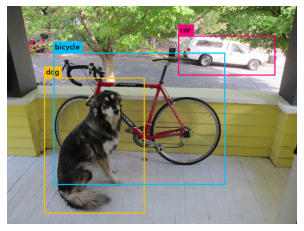

In [14]:
import cv2
img = cv2.imread("predictions.jpg")
show_img = cv2.cvtColor(img, cv2.COLOR_BGRA2RGB)
pl.imshow(show_img)
pl.axis('off')

In [15]:
cd /content/darknet

/content/darknet


In [16]:
from google.colab import files
uploaded = files.upload()

Saving 360px-Vincent_van_Gogh_-_Sunflowers_-_VGM_F458.jpeg to 360px-Vincent_van_Gogh_-_Sunflowers_-_VGM_F458.jpeg


In [18]:
pwd

'/content/darknet'

In [19]:
!./darknet yolo test /content/darknet/cfg/yolov1.cfg /content/darknet/yolov1.weights /content/darknet/360px-Vincent_van_Gogh_-_Sunflowers_-_VGM_F458.jpeg

layer     filters    size              input                output
    0 conv     64  7 x 7 / 2   448 x 448 x   3   ->   224 x 224 x  64  0.944 BFLOPs
    1 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    2 conv    192  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 192  2.775 BFLOPs
    3 max          2 x 2 / 2   112 x 112 x 192   ->    56 x  56 x 192
    4 conv    128  1 x 1 / 1    56 x  56 x 192   ->    56 x  56 x 128  0.154 BFLOPs
    5 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    6 conv    256  1 x 1 / 1    56 x  56 x 256   ->    56 x  56 x 256  0.411 BFLOPs
    7 conv    512  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 512  7.399 BFLOPs
    8 max          2 x 2 / 2    56 x  56 x 512   ->    28 x  28 x 512
    9 conv    256  1 x 1 / 1    28 x  28 x 512   ->    28 x  28 x 256  0.206 BFLOPs
   10 conv    512  3 x 3 / 1    28 x  28 x 256   ->    28 x  28 x 512  1.850 BFLOPs
   11 conv    256  1 x 1 / 1    28 x  28 x 512   ->

(-0.5, 359.5, 471.5, -0.5)

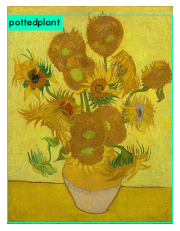

In [20]:
img = cv2.imread("predictions.jpg")
show_img = cv2.cvtColor(img, cv2.COLOR_BGRA2RGB)
pl.imshow(show_img)
pl.axis('off')

In [21]:
from google.colab import files
uploaded = files.upload()

Saving potw1821a.jpeg to potw1821a.jpeg


In [22]:
!./darknet yolo test /content/darknet/cfg/yolov1.cfg /content/darknet/yolov1.weights /content/darknet/potw1821a.jpeg

layer     filters    size              input                output
    0 conv     64  7 x 7 / 2   448 x 448 x   3   ->   224 x 224 x  64  0.944 BFLOPs
    1 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    2 conv    192  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 192  2.775 BFLOPs
    3 max          2 x 2 / 2   112 x 112 x 192   ->    56 x  56 x 192
    4 conv    128  1 x 1 / 1    56 x  56 x 192   ->    56 x  56 x 128  0.154 BFLOPs
    5 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    6 conv    256  1 x 1 / 1    56 x  56 x 256   ->    56 x  56 x 256  0.411 BFLOPs
    7 conv    512  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 512  7.399 BFLOPs
    8 max          2 x 2 / 2    56 x  56 x 512   ->    28 x  28 x 512
    9 conv    256  1 x 1 / 1    28 x  28 x 512   ->    28 x  28 x 256  0.206 BFLOPs
   10 conv    512  3 x 3 / 1    28 x  28 x 256   ->    28 x  28 x 512  1.850 BFLOPs
   11 conv    256  1 x 1 / 1    28 x  28 x 512   ->

(-0.5, 374.5, 299.5, -0.5)

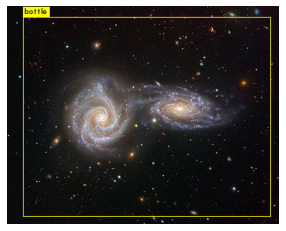

In [23]:
img = cv2.imread("predictions.jpg")
show_img = cv2.cvtColor(img, cv2.COLOR_BGRA2RGB)
pl.imshow(show_img)
pl.axis('off')

In [24]:
from google.colab import files
uploaded = files.upload()

Saving Picasso_Guernica-1.jpeg to Picasso_Guernica-1.jpeg


In [25]:
!./darknet yolo test /content/darknet/cfg/yolov1.cfg /content/darknet/yolov1.weights /content/darknet/Picasso_Guernica-1.jpeg

layer     filters    size              input                output
    0 conv     64  7 x 7 / 2   448 x 448 x   3   ->   224 x 224 x  64  0.944 BFLOPs
    1 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    2 conv    192  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 192  2.775 BFLOPs
    3 max          2 x 2 / 2   112 x 112 x 192   ->    56 x  56 x 192
    4 conv    128  1 x 1 / 1    56 x  56 x 192   ->    56 x  56 x 128  0.154 BFLOPs
    5 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    6 conv    256  1 x 1 / 1    56 x  56 x 256   ->    56 x  56 x 256  0.411 BFLOPs
    7 conv    512  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 512  7.399 BFLOPs
    8 max          2 x 2 / 2    56 x  56 x 512   ->    28 x  28 x 512
    9 conv    256  1 x 1 / 1    28 x  28 x 512   ->    28 x  28 x 256  0.206 BFLOPs
   10 conv    512  3 x 3 / 1    28 x  28 x 256   ->    28 x  28 x 512  1.850 BFLOPs
   11 conv    256  1 x 1 / 1    28 x  28 x 512   ->

(-0.5, 1999.5, 903.5, -0.5)

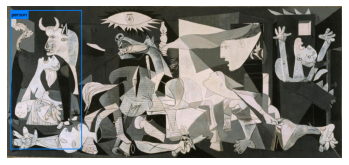

In [26]:
img = cv2.imread("predictions.jpg")
show_img = cv2.cvtColor(img, cv2.COLOR_BGRA2RGB)
pl.imshow(show_img)
pl.axis('off')